<a href="https://colab.research.google.com/github/FaustoFLES/Programacion-Analitica/blob/main/Pr%C3%A1ctica_23_Regresi%C3%B3n_Ridge_y_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---

### **📋 Instrucciones**  

#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.  

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    

#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)  

#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  

#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  

#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  

#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?  

---

### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.  

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Escuela/Maestria/3er Semestre/Programacion Analitica/Class data/insurance.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Processing column: age


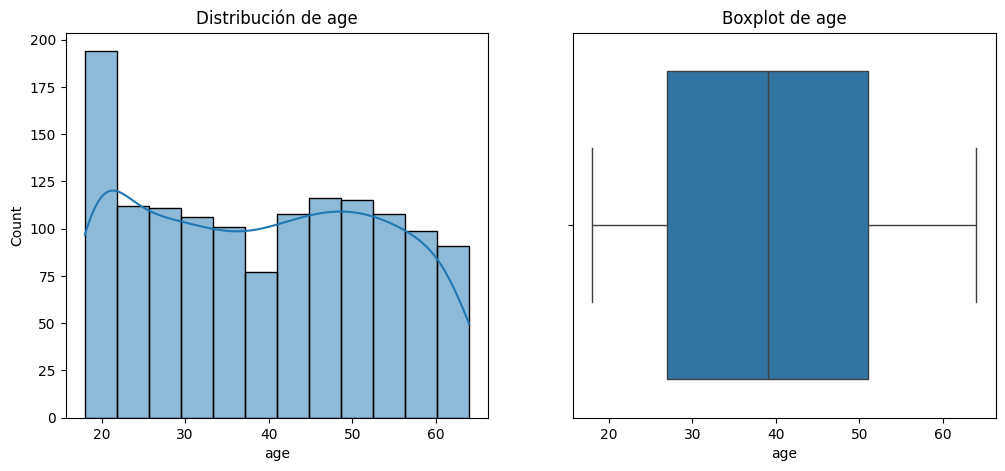

Medidas de tendencia central y dispersión para age:
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
------------------------------
Processing column: bmi


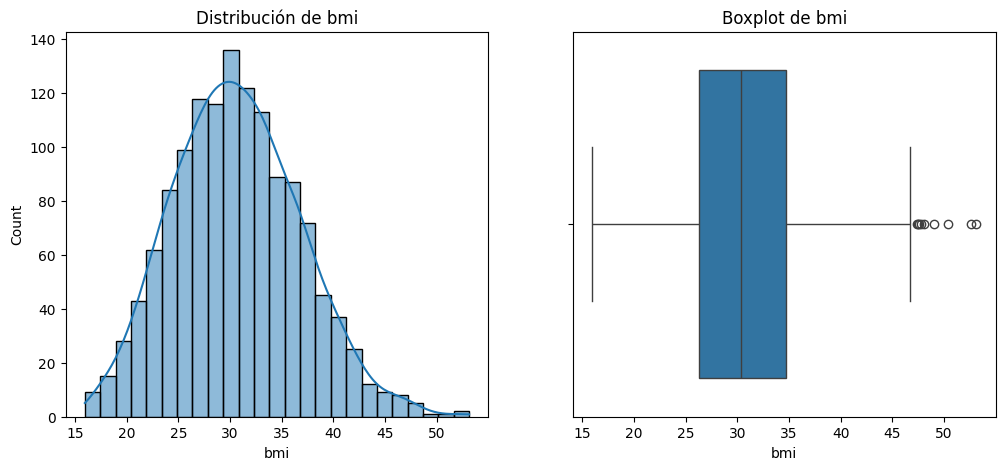

Medidas de tendencia central y dispersión para bmi:
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
------------------------------
Processing column: children


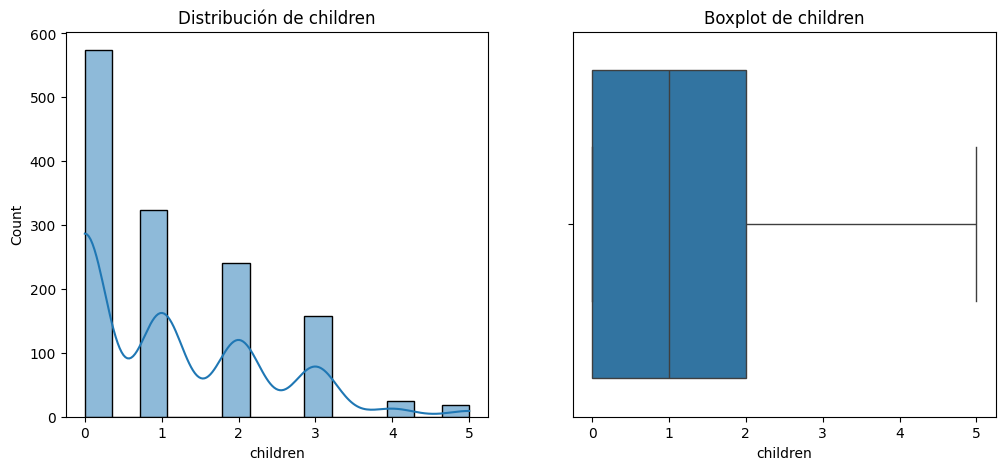

Medidas de tendencia central y dispersión para children:
count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
------------------------------
Processing column: charges


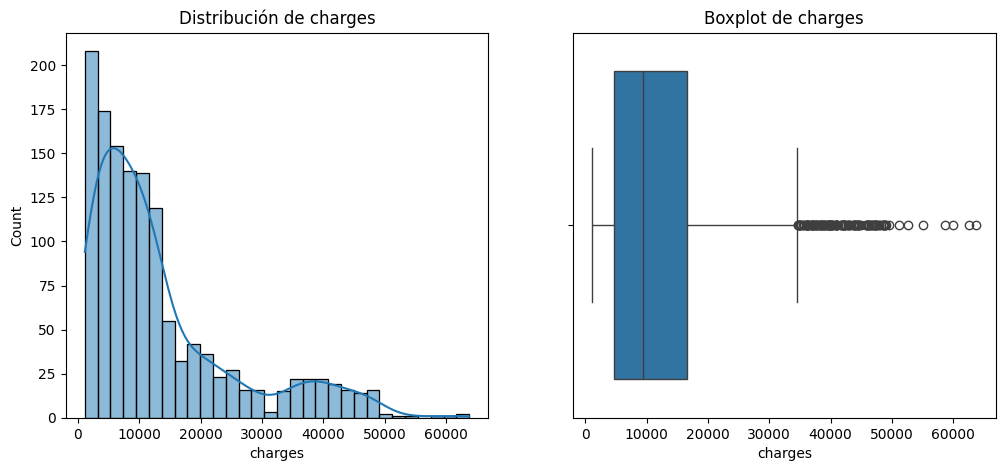

Medidas de tendencia central y dispersión para charges:
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
------------------------------


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms and boxplots for numerical columns
for col in numerical_cols:
    print(f"Processing column: {col}")
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

    # Calculate and print central tendency and dispersion measures
    print(f"Medidas de tendencia central y dispersión para {col}:")
    print(df[col].describe())
    print("-" * 30)

Processing column: sex


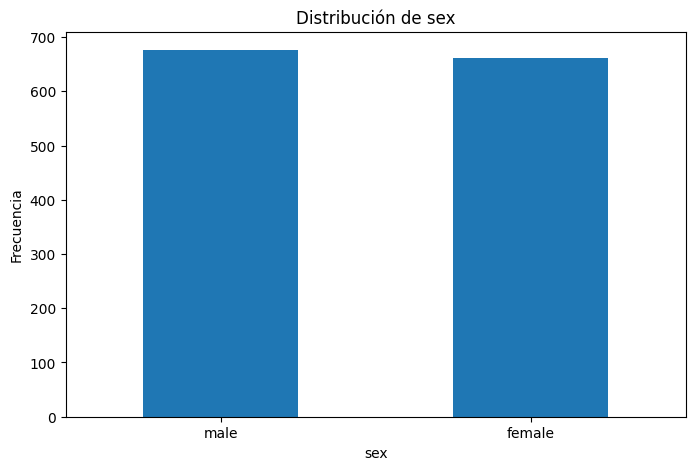

Frecuencias para sex:
sex
male      676
female    662
Name: count, dtype: int64
------------------------------
Processing column: smoker


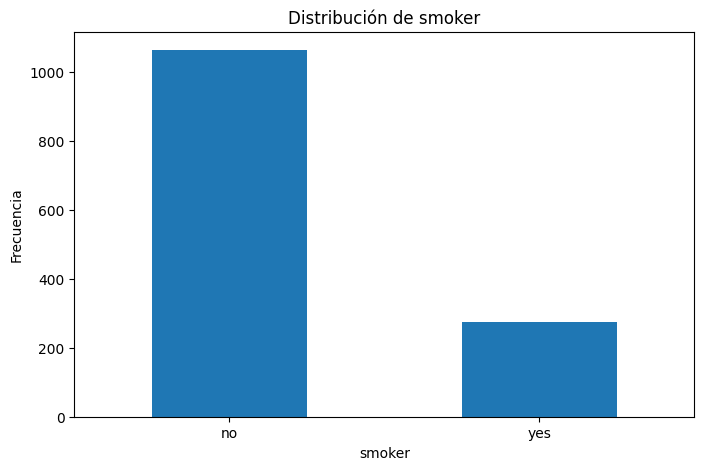

Frecuencias para smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64
------------------------------
Processing column: region


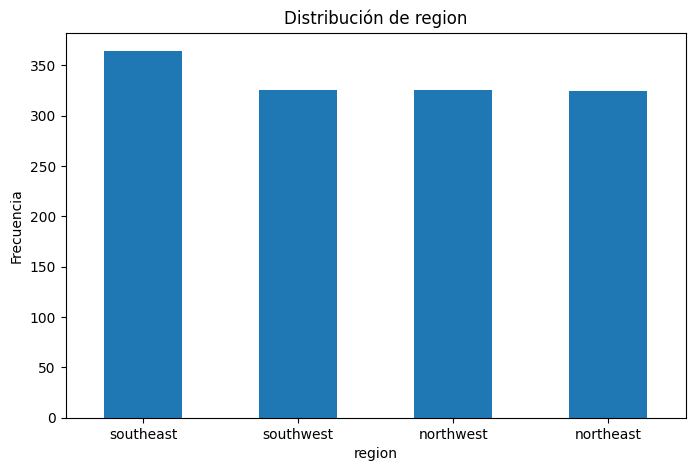

Frecuencias para region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
------------------------------


In [4]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot bar plots for categorical columns
for col in categorical_cols:
    print(f"Processing column: {col}")
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=0)
    plt.show()

    print(f"Frecuencias para {col}:")
    print(df[col].value_counts())
    print("-" * 30)

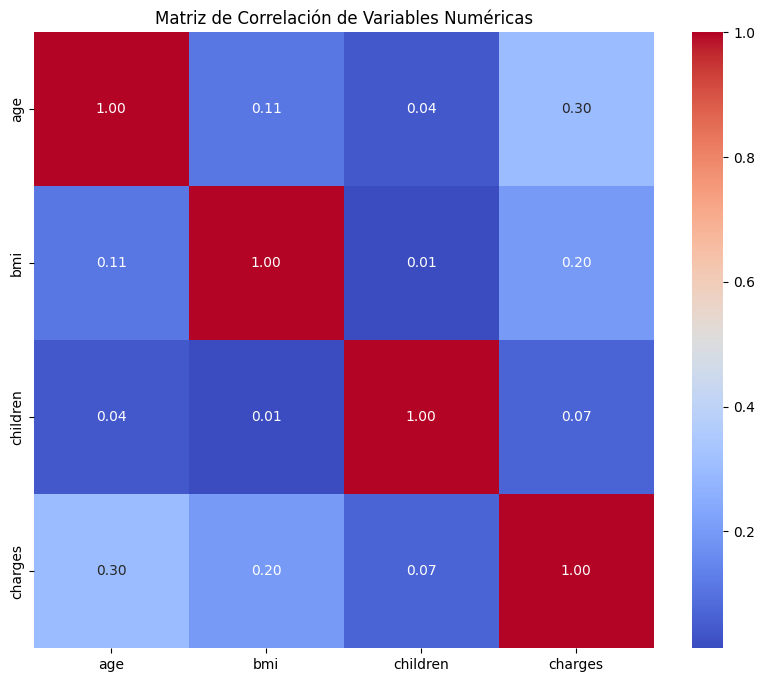

Variables más correlacionadas con 'charges':
charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


In [5]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Identify variables most correlated with 'charges'
print("Variables más correlacionadas con 'charges':")
print(correlation_matrix['charges'].sort_values(ascending=False))

Pregunta: ¿Qué variables están más correlacionadas con el target (charges)? (salida del dataset)

En primer lugar esta 'Age' con un valor de 0.3, seguido de bmi 0.2 y children 0.07

In [6]:
from sklearn.impute import SimpleImputer
import numpy as np

# Check for missing values
print("Missing values before imputation:")
print(df.isnull().sum())

# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include='object').columns

# Apply SimpleImputer to numerical columns (e.g., using the mean)
imputer_numerical = SimpleImputer(strategy='mean')
X[numerical_cols] = imputer_numerical.fit_transform(X[numerical_cols])

# Apply SimpleImputer to categorical columns (e.g., using the most frequent value)
imputer_categorical = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = imputer_categorical.fit_transform(X[categorical_cols])

print("\nMissing values after imputation:")
print(X.isnull().sum())

Missing values before imputation:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Missing values after imputation:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64


In [11]:
from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoder to categorical columns, dropping one category to avoid multicollinearity
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
X_categorical_encoded = onehot_encoder.fit_transform(X[categorical_cols])

# Create a DataFrame from the encoded categorical features
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns from X
X_numerical = X.drop(categorical_cols, axis=1)

# Concatenate numerical and encoded categorical features
X_processed = pd.concat([X_numerical, X_categorical_encoded_df], axis=1)

print("Processed data after OneHotEncoding:")
display(X_processed.head())

Processed data after OneHotEncoding:


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,0.0,1.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,1.0,0.0,1.0,0.0,0.0


In [12]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to numerical columns
# We need to identify the numerical columns again in the processed dataframe
numerical_cols_processed = X_processed.select_dtypes(include=np.number).columns

scaler = StandardScaler()
X_processed[numerical_cols_processed] = scaler.fit_transform(X_processed[numerical_cols_processed])

print("\nProcessed data after StandardScaler:")
display(X_processed.head())

# Verify that the transformed dataset has no null values
print("\nMissing values after all preprocessing steps:")
print(X_processed.isnull().sum())


Processed data after StandardScaler:


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,0.989591,-0.507463,1.765481,-0.611324,-0.566418



Missing values after all preprocessing steps:
age                 0
bmi                 0
children            0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


In [13]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# 1. Ajustar el modelo Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predecir y evaluar el modelo Lasso
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Resultados del modelo Lasso:")
print(f"MSE: {mse_lasso:.2f}")
print(f"R²: {r2_lasso:.2f}")

# Analizar coeficientes de Lasso
print("\nCoeficientes del modelo Lasso:")
lasso_coef = pd.Series(lasso_model.coef_, index=X_processed.columns)
print(lasso_coef.sort_values(ascending=False))

print("-" * 50)

# 2. Ajustar el modelo Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predecir y evaluar el modelo Ridge
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nResultados del modelo Ridge:")
print(f"MSE: {mse_ridge:.2f}")
print(f"R²: {r2_ridge:.2f}")

# Analizar coeficientes de Ridge
print("\nCoeficientes del modelo Ridge:")
ridge_coef = pd.Series(ridge_model.coef_, index=X_processed.columns)
print(ridge_coef.sort_values(ascending=False))

Resultados del modelo Lasso:
MSE: 33597338.15
R²: 0.78

Coeficientes del modelo Lasso:
smoker_yes          9544.141622
age                 3609.062392
bmi                 2054.733679
children             512.384135
sex_male              -9.182177
region_northwest    -158.651645
region_southeast    -292.401421
region_southwest    -346.951523
dtype: float64
--------------------------------------------------

Resultados del modelo Ridge:
MSE: 33604956.54
R²: 0.78

Coeficientes del modelo Ridge:
smoker_yes          9535.086692
age                 3605.550631
bmi                 2052.961260
children             512.358230
sex_male              -8.619161
region_northwest    -158.444622
region_southeast    -291.115771
region_southwest    -346.429567
dtype: float64


📌 Pregunta:

¿Qué modelo tiene un mejor R²?

Ambos modelos riene un valor de R cuadrada muy similar lo que significa que estadisticamente hablando son iguales

¿Por qué crees que ocurre esto?

Porque no existe una multicoloniealidad muy severa entre las variables predictoras

¿Qué variables tienen coeficientes cercanos a cero en Lasso?

sex_male y smoker_yes

¿Por qué?

Esto es por la penalizacion natural que agrega lasso debido al valor absoluto de los coeficientes, lo que significa que los valores menos relevantes se convierten en cero

--- Checking Assumptions for Lasso Model ---


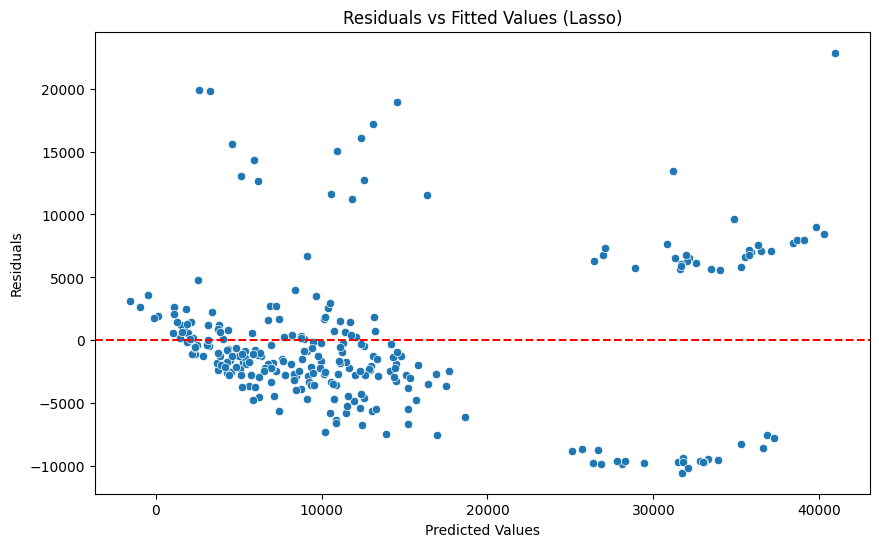

Ideally, residuals should be randomly scattered around zero.


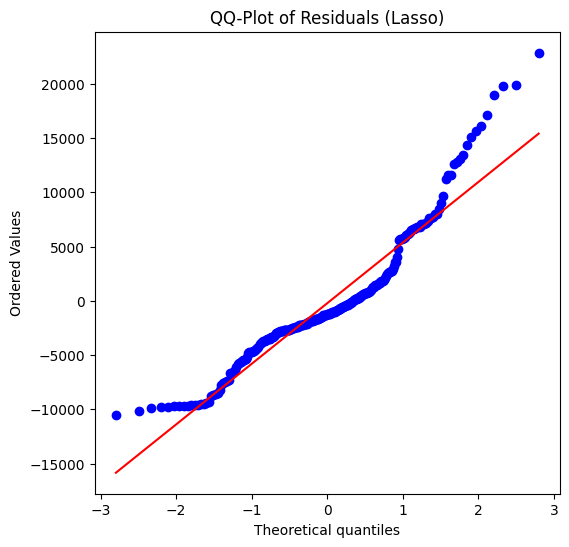

Shapiro-Wilk Test for Normality (Lasso):
Statistic: 0.9139, p-value: 0.0000
Residuals do not appear to be normally distributed (reject H0).

Breusch-Pagan Test for Homoscedasticity (Lasso):
LM Statistic: 34.6642, LM-Test p-value: 0.0000, F-Statistic: 4.8096, F-Test p-value: 0.0000
Residuals appear to be heteroscedastic (reject H0).

Variance Inflation Factor (VIF) (Lasso):
            feature       VIF
6  region_southeast  1.652230
7  region_southwest  1.529411
5  region_northwest  1.518823
1               bmi  1.106630
0               age  1.016822
4        smoker_yes  1.012074
3          sex_male  1.008900
2          children  1.004011
VIF > 10 indicates potential multicollinearity issues.
--------------------------------------------------
--- Checking Assumptions for Ridge Model ---


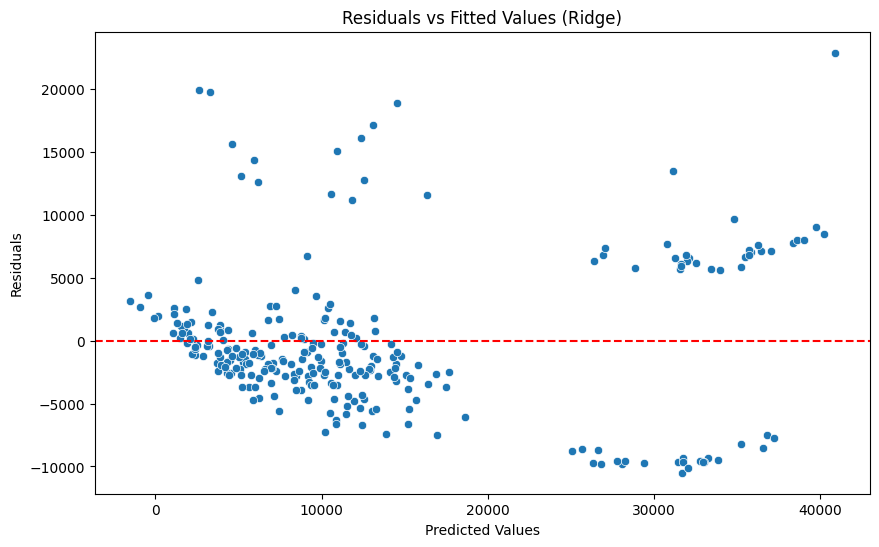

Ideally, residuals should be randomly scattered around zero.


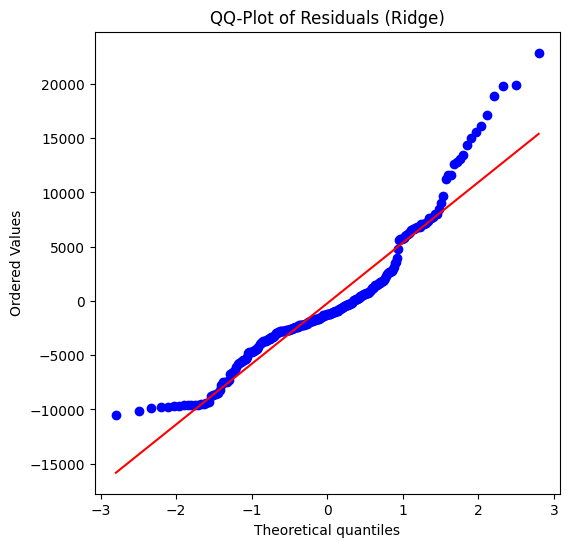

Shapiro-Wilk Test for Normality (Ridge):
Statistic: 0.9136, p-value: 0.0000
Residuals do not appear to be normally distributed (reject H0).

Breusch-Pagan Test for Homoscedasticity (Ridge):
LM Statistic: 34.7917, LM-Test p-value: 0.0000, F-Statistic: 4.8299, F-Test p-value: 0.0000
Residuals appear to be heteroscedastic (reject H0).

Variance Inflation Factor (VIF) (Ridge):
            feature       VIF
6  region_southeast  1.652230
7  region_southwest  1.529411
5  region_northwest  1.518823
1               bmi  1.106630
0               age  1.016822
4        smoker_yes  1.012074
3          sex_male  1.008900
2          children  1.004011
VIF > 10 indicates potential multicollinearity issues.
--------------------------------------------------


In [14]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

# Function to check assumptions for a given model
def check_assumptions(model, X_test, y_test, model_name):
    print(f"--- Checking Assumptions for {model_name} Model ---")

    # Calculate residuals
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    # 1. Linearity (Residuals vs Fitted values plot)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Fitted Values ({model_name})')
    plt.show()
    print("Ideally, residuals should be randomly scattered around zero.")

    # 2. Normality of Residuals (QQ-Plot and Shapiro-Wilk test)
    plt.figure(figsize=(6, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'QQ-Plot of Residuals ({model_name})')
    plt.show()

    shapiro_test = stats.shapiro(residuals)
    print(f"Shapiro-Wilk Test for Normality ({model_name}):")
    print(f"Statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}")
    if shapiro_test.pvalue > 0.05:
        print("Residuals appear to be normally distributed (fail to reject H0).")
    else:
        print("Residuals do not appear to be normally distributed (reject H0).")

    # 3. Homoscedasticity (Breusch-Pagan test)
    # Need to add a constant to the predictors for the test
    X_test_with_const = sm.add_constant(X_test)
    bp_test = het_breuschpagan(residuals, X_test_with_const)
    print(f"\nBreusch-Pagan Test for Homoscedasticity ({model_name}):")
    print(f"LM Statistic: {bp_test[0]:.4f}, LM-Test p-value: {bp_test[1]:.4f}, F-Statistic: {bp_test[2]:.4f}, F-Test p-value: {bp_test[3]:.4f}")
    if bp_test[1] > 0.05:
        print("Residuals appear to be homoscedastic (fail to reject H0).")
    else:
        print("Residuals appear to be heteroscedastic (reject H0).")

    # 4. Multicollinearity (VIF) - Only for the predictor variables in the original X_processed
    print(f"\nVariance Inflation Factor (VIF) ({model_name}):")
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_processed.columns
    vif_data["VIF"] = [variance_inflation_factor(X_processed.values, i) for i in range(X_processed.shape[1])]
    print(vif_data.sort_values(by="VIF", ascending=False))
    print("VIF > 10 indicates potential multicollinearity issues.")

    print("-" * 50)

# Check assumptions for Lasso model
check_assumptions(lasso_model, X_test, y_test, "Lasso")

# Check assumptions for Ridge model
check_assumptions(ridge_model, X_test, y_test, "Ridge")

📌 Pregunta:

¿Se cumplen los supuestos en ambos modelos?

No

Si hay heterocedasticidad, ¿cómo podría solucionarse?

Se podrian aplicar una transformacion logaritmica a los datos o raiz cuadrada.

📊 Analizar:

¿Qué modelo es más interpretable?
¿Cuál reduce mejor el sobreajuste?
¿Qué variables son más importantes en cada caso?

📊 Analizar:

**¿Qué modelo es más interpretable?**

El modelo Lasso es generalmente más interpretable que Ridge, especialmente con valores de `alpha` más altos.

**¿Cuál reduce mejor el sobreajuste?**

Lasso ha llevado algunos coeficientes a cero, Lasso podría ser ligeramente mejor para la selección de variables, lo que a su vez puede ayudar a reducir el sobreajuste al simplificar el modelo. Sin embargo, dado el R² similar, ambos modelos parecen manejar el sobreajuste de manera comparable con los `alpha` utilizados.

**¿Qué variables son más importantes en cada caso?**

**Modelo Lasso:** Las variables con los coeficientes de mayor magnitud (valor absoluto) son:

    1.  `smoker_yes` (~9544) - Impacto positivo muy grande.
    2.  `age` (~3609) - Impacto positivo.
    3.  `bmi` (~2054) - Impacto positivo.
    4.  `children` (~512) - Impacto positivo.
    5. `region_southwest` (~ -347) - Impacto negativo.
    6. `region_southeast` (~ -292) - Impacto negativo.
    7. `region_northwest` (~ -159) - Impacto negativo.
    8.  `sex_male` y otras categorías de región con coeficiente cero.

**Modelo Ridge:** Las variables con los coeficientes de mayor magnitud son muy similares a las de Lasso, aunque ningún coeficiente es exactamente cero:

    1.  `smoker_yes` (~9535) - Impacto positivo muy grande.
    2.  `age` (~3605) - Impacto positivo.
    3.  `bmi` (~2052) - Impacto positivo.
    4.  `children` (~512) - Impacto positivo.
    5. `region_southwest` (~ -346) - Impacto negativo.
    6. `region_southeast` (~ -291) - Impacto negativo.
    7. `region_northwest` (~ -158) - Impacto negativo.
    8.  `sex_male` (~ -8.6)